## Exploring Methods to Subset Daymet from TDS/NCSS

## Siphon 

### What is Siphon

Siphon is a collection of Python utilities for downloading data from remote data services. Much of Siphon’s current functionality focuses on access to data hosted on a THREDDS Data Server. It also provides clients to a variety of simple web services.

On line help:
https://unidata.github.io/siphon/latest/index.html

Unidata has a siphon tutorial here:  https://unidata.github.io/python-training/workshop/Siphon/siphon-overview/

Another tutorial from ESIP here:  https://esip.figshare.com/articles/Siphon_Tutorial_ipynb/5244637

Install Siphon:
Anaconda install:
`conda install -c conda-forge siphon`

In [1]:
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog

Here's the url for Daymet daily data

https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html

or in a year
https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html

Here's the example from UCAR's siphon tutorial

cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/nexrad/level3/'
                 f'N0Q/LRX/{date:%Y%m%d}/catalog.xml')

----

##  1. Intro: Use Siphon to Access the Daymet Daily Data THREDDS Catalog

In [2]:
# Using Siphon, navigate from the top-level THREDDS catalog for Daymet Daily data at 
#                      https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html
# This takes care of downloading the catalog, parsing the XML, and doing useful things. 
# top_cat means top of catalog.  There's a warning about changing from html to xml, but that's ok.

top_cat = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html')

C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.xml
  new_url))


In [ ]:
# From here we can do things like look at all the catalog references...
# Can see what's available at the top 'reference' level. 
# siphon.catalog:  Code to support reading and parsing catalog files from a THREDDS Data Server (TDS).
#                  Help identifying the latest dataset and finding proper URLs to access the data.
# siphon.catalog.CatalogRef(base_url, element_node)
#                  An object for holding catalog references obtained from a THREDDS Client Catalog.

list(top_cat.catalog_refs)

In [ ]:
#Or loop thru the list.
for ref in top_cat.catalog_refs:
    print(ref)

In [ ]:
#We can also extract by using the name of the item:
ref = top_cat.catalog_refs['1980']
ref.href

In [3]:
daymet_cat_1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html')

C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.xml
  new_url))


In [ ]:
# Use the datasets attribute to see the list of datasets available
daymet_cat_1980.datasets
#or
list(daymet_cat_1980.datasets)

In [ ]:
#or - handy for looping if needed
for ref in daymet_cat_1980.datasets:
    print(ref)

In [ ]:
dataset13 = daymet_cat_1980.datasets[13]
print(dataset13)
# or
dataset13.name

In [ ]:
# or
dataset_tmaxdaily1980 = daymet_cat_1980.datasets['Daymet v3 daily maximum temperature for na (1980)']
print(dataset_tmaxdaily1980)

In [ ]:
# look at the access url's for a dataset
#ds.access_urls
dataset_tmaxdaily1980.access_urls

----

## 2.  Use Siphon to Remotely Access Data

In [4]:
# Using the same data we retrieved above:
# In working with daily data.  The files are listed by an alias.
daymet_cat_1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html')
dataset_tmaxdaily1980_na = daymet_cat_1980.datasets['Daymet v3 daily maximum temperature for na (1980)']
dataset_tmaxdaily1980_hi = daymet_cat_1980.datasets['Daymet v3 daily maximum temperature for hawaii (1980)']

In [5]:
# Siphon can download the file locally.  
# PROBLEM:  This downloads a file, but need to add .nc to the name or it's not recognized as netCDF format.
# Would be best if file was listed by filename, not an alias
dataset_tmaxdaily1980_hi.download()

In [ ]:
# Look in your file explorer panel or run the cell below to verify that the file was downloaded.
# But this isn't downloading the netCDF file.  The actual file names aren't listed, so it's downloading an object.
import os 
os.listdir()

In [6]:
# Annual and monthly files are listed in TDS by name. Test with annual climatolgy. 
# ds_id: 1343 annual data, ds_id: 1345 monthly data, ds_id: 1328 daily data
daymet_ann_cat = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html')
daymet_ann_cat.datasets

C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.xml
  new_url))


['daymet_v3_prcp_annttl_1980_hi.nc4', 'daymet_v3_prcp_annttl_1980_na.nc4', 'daymet_v3_prcp_annttl_1980_pr.nc4', 'daymet_v3_prcp_annttl_1981_hi.nc4', 'daymet_v3_prcp_annttl_1981_na.nc4', 'daymet_v3_prcp_annttl_1981_pr.nc4', 'daymet_v3_prcp_annttl_1982_hi.nc4', 'daymet_v3_prcp_annttl_1982_na.nc4', 'daymet_v3_prcp_annttl_1982_pr.nc4', 'daymet_v3_prcp_annttl_1983_hi.nc4', 'daymet_v3_prcp_annttl_1983_na.nc4', 'daymet_v3_prcp_annttl_1983_pr.nc4', 'daymet_v3_prcp_annttl_1984_hi.nc4', 'daymet_v3_prcp_annttl_1984_na.nc4', 'daymet_v3_prcp_annttl_1984_pr.nc4', 'daymet_v3_prcp_annttl_1985_hi.nc4', 'daymet_v3_prcp_annttl_1985_na.nc4', 'daymet_v3_prcp_annttl_1985_pr.nc4', 'daymet_v3_prcp_annttl_1986_hi.nc4', 'daymet_v3_prcp_annttl_1986_na.nc4', 'daymet_v3_prcp_annttl_1986_pr.nc4', 'daymet_v3_prcp_annttl_1987_hi.nc4', 'daymet_v3_prcp_annttl_1987_na.nc4', 'daymet_v3_prcp_annttl_1987_pr.nc4', 'daymet_v3_prcp_annttl_1988_hi.nc4', 'daymet_v3_prcp_annttl_1988_na.nc4', 'daymet_v3_prcp_annttl_1988_pr.nc4', 

In [7]:
dataset_annavgtmax_na_1980 = daymet_ann_cat.datasets['daymet_v3_tmax_annavg_1980_na.nc4']
print(dataset_annavgtmax_na_1980)

daymet_v3_tmax_annavg_1980_na.nc4


In [ ]:
#Takes a while to download.  Commenting out for convenience.
#dataset_annavgtmax_na_1980.download()

You can also read from the file as if it were local using a 'file-like object'
For this dataset, these next couple lines can be skipped for the next option below because we can read it as a netCDF file.
Keeping here for reference.

fobj = dataset_annavgtmax_na1980.remote_open()

data_annavgtmax_na1980 = fobj.read()

In [8]:
# This is handy if you have Python code to read a particular format.
# It's also possible to get access to the file through services that provide netCDF4-like access, but for the remote file. 
# This access allows downloading information only for variables of interest, or for (index-based) subsets of that data.

#nc = dataset_annavgtmax_na_1980.remote_access()
#print(nc)

annavgtmax_na_1980_remote = dataset_annavgtmax_na_1980.remote_access()
print(annavgtmax_na_1980_remote)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    start_year: 1980
    source: Daymet Software Version 3.0
    Version_software: Daymet Software Version 3.0
    Version_data: Daymet Data Version 3.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    DODS_EXTRA.Unlimited_Dimension: time
    dimensions(sizes): time(1), nv(2), x(7814), y(8075)
    variables(dimensions): float32 time_bnds(time,nv), int16 lambert_conformal_conic(), float32 time(time), float32 x(x), float32 y(y), float32 lat(y,x), float32 lon(y,x), float32 tmax(time,y,x)
    groups: 



In [9]:
list(annavgtmax_na_1980_remote.variables)

['time_bnds',
 'lambert_conformal_conic',
 'time',
 'x',
 'y',
 'lat',
 'lon',
 'tmax']

In [10]:
#print(nc.variables.keys())
print(annavgtmax_na_1980_remote.variables['tmax'])

<class 'netCDF4._netCDF4.Variable'>
float32 tmax(time, y, x)
    _FillValue: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    missing_value: -9999.0
    units: degrees C
    cell_methods: area: mean time: minimum within days time: mean over days
    long_name: annual average of daily maximum temperature
    _ChunkSizes: [   1 1010  977]
unlimited dimensions: time
current shape = (1, 8075, 7814)
filling off



In [11]:
# Plot small sample image
daymet_ann_cat = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html')
dataset_annavgtmax_hi_1981 = daymet_ann_cat.datasets['daymet_v3_tmax_annavg_1981_hi.nc4']
annavgtmax_hi_1981_remote = dataset_annavgtmax_hi_1981.remote_access()
annavgtmax_hi_1981_remote


C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.xml
  new_url))


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    start_year: 1981
    source: Daymet Software Version 3.0
    Version_software: Daymet Software Version 3.0
    Version_data: Daymet Data Version 3.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    DODS_EXTRA.Unlimited_Dimension: time
    dimensions(sizes): time(1), nv(2), x(284), y(584)
    variables(dimensions): float32 time_bnds(time,nv), int16 lambert_conformal_conic(), float32 time(time), float32 x(x), float32 y(y), float32 lat(y,x), float32 lon(y,x), float32 tmax(time,y,x)
    groups: 

Text(0.5, 0.98, 'Average Daily Maximum Temperature - 1980')

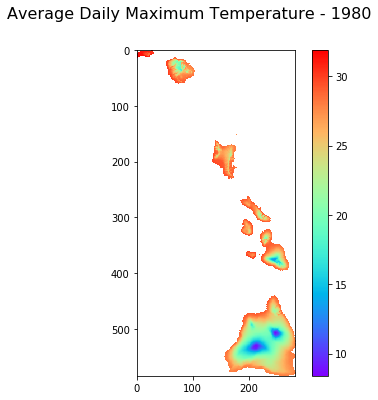

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)
imgplot = plt.imshow(annavgtmax_hi_1981_remote.variables['tmax'][0], cmap='rainbow')
plt.colorbar()
plt.suptitle('Average Daily Maximum Temperature - 1980', fontsize=16)

#This also works
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
#ax.imshow(annavgtmax_hi_1981_remote.variables['tmax'][0], cmap='rainbow')
#fig.suptitle('Average Daily Maximum Temperature - 1980', fontsize=16)


----

## 3. Using Siphon to Subset Data

For some datasets, subset support is availble:

* Defaults to netCDF Subset Service (NCSS)
* Allows specifying latitude, longitude, time, and variables
* NCSS downloads a netCDF file
* To use NCSS, we can call subset and get a client.

In [13]:
#To use NCSS, we can call subset and get a client.
# Get the value for one lon,lat from annual data
# (Below steps, do this with monthly data.  It will have 12 time steps.  Need to get daily data recognized.)

dataset_annavgtmax_na1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html').datasets['daymet_v3_tmax_annavg_1980_na.nc4']
ncss = dataset_annavgtmax_na1980.subset()
ncss.variables


C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.xml
  new_url))


{'lat', 'lon', 'tmax'}

In [14]:
# With this client we can set up a query for the data we want
# Point Query

query = ncss.query()
query.lonlat_point(lon=-105, lat=40)
query.all_times()
query.variables('tmax')
query.accept('netcdf')

var=tmax&temporal=all&longitude=-105&latitude=40&accept=netcdf

In [15]:
# Next, get the data, which will return it as an already opened netCDF4 object. The annual climatology only has one time step.

nc_ann = ncss.get_data(query)
tmax_point_data = nc_ann.variables['tmax'][:]
times = nc_ann.variables['time'][:]
print(times)
print(tmax_point_data)

[182.5]
[18.427397]


C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1345/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1345/catalog.xml
  new_url))


{'tmax', 'lat', 'lon'}
[ 15.5  45.5  75.5 106.  136.5 167. ]
[ 2.967742  7.206897  9.5      15.316667 19.725807 30.95    ]


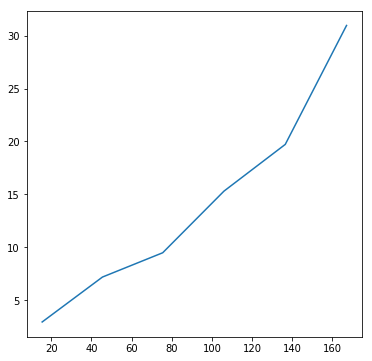

In [16]:
# Monthly Climatology
# Doing this with monthly data.  It will have 12 time steps.

import datetime

dataset_monavgtmax_na1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1345/catalog.html').datasets['daymet_v3_tmax_monavg_1980_na.nc4']
ncss = dataset_monavgtmax_na1980.subset()
print(ncss.variables)

query = ncss.query()
query.lonlat_point(lon=-105, lat=40)
#query.all_times()  comment this out to demonstrate subsetting time in next line

# Can do this for a subset of time
#time_range(start, end)
query.time_range(datetime.datetime(1980,1,1), datetime.datetime(1980,6,30))
query.variables('tmax')
query.accept('netcdf')

nc_ann = ncss.get_data(query)
tmax_point_data = nc_ann.variables['tmax'][:]
times = nc_ann.variables['time'][:]

print(times)

print(tmax_point_data)

g, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(times, tmax_point_data)

In [17]:
# Gridded Subset with a lon/lat Bounding Box
##### Request the data for a particular time for a gridded subset or region of interest.

import datetime

# First, with annual data
dataset_annavgtmax_na1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html').datasets['daymet_v3_tmax_annavg_1980_na.nc4']
ncss_anntmax80 = dataset_annavgtmax_na1980.subset()
ncss_anntmax80.variables

query = ncss_anntmax80.query()
query.lonlat_box(east=-85, west=-90, south=40, north=45)
query.all_times()
#time_range(start, end)
#query.time_range(datetime.datetime(1980,1,1), datetime.datetime(1980,6,30))
#query.time_range(datetime.datetime(1980,7,1), datetime.datetime(1980,7,1))
query.variables('tmax')
query.accept('netcdf')
nc_subset_anntmax80 = ncss_anntmax80.get_data(query)
nc_subset_anntmax80

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    start_year: 1980
    source: Daymet Software Version 3.0
    Version_software: Daymet Software Version 3.0
    Version_data: Daymet Data Version 3.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = /daacftp/daymet/Daymet_V3_Annual_Climatology/data/daymet_v3_tmax_annavg_1980_na.nc4; Translation Date = 2020-09-01T16:46:27.843Z
    geospatial_lat_min: 39.43076103308819
    geospatial_lat_max: 45.53009889029777
    geospatial_lon_min: -90.77285560361639
    geospatial_lon_max: -83.75646847772083
    dimensions(sizes): time(1), y(583), x(467)
    variables(dimensions): float32 tmax(time,y,x), float32 time(time), float32 y(y), float

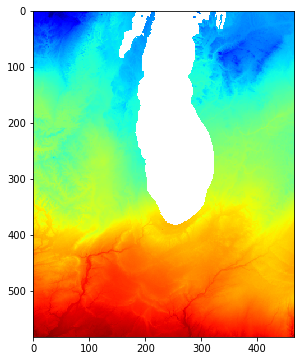

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(nc_subset_anntmax80.variables['tmax'][0], cmap='jet')

In [ ]:
# Next, subset with time

In [19]:
# Gridded Subset with a lon/lat Bounding Box
##### Request the data for a particular time for a gridded subset or region of interest.

import datetime

# With Monthly data
#https://thredds.daac.ornl.gov/thredds/ncss/grid/ornldaac/1345/daymet_v3_tmax_monavg_1980_na.nc4/dataset.html
dataset_monavgtmax_na1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1345/catalog.html').datasets['daymet_v3_tmax_monavg_1980_na.nc4']
ncss_montmax80 = dataset_monavgtmax_na1980.subset()
ncss_montmax80.variables


{'lat', 'lon', 'tmax'}

In [20]:
# Subset Monthly Data
query = ncss_montmax80.query()
query.lonlat_box(east=-85, west=-90, south=40, north=45)
query.all_times()
#time_range(start, end)
#query.time_range(datetime.datetime(1980,1,1), datetime.datetime(1980,6,30))
#query.time_range(datetime.datetime(1980,7,1), datetime.datetime(1980,7,1))
query.variables('tmax')
query.accept('netcdf')
nc_subset_montmax80 = ncss_montmax80.get_data(query)
nc_subset_montmax80

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    start_year: 1980
    source: Daymet Software Version 3.0
    Version_software: Daymet Software Version 3.0
    Version_data: Daymet Data Version 3.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    NCO: "4.5.3"
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = /daacftp/daymet/Daymet_V3_Monthly_Climatology/data/daymet_v3_tmax_monavg_1980_na.nc4; Translation Date = 2020-09-01T16:46:50.949Z
    geospatial_lat_min: 39.43076103292464
    geospatial_lat_max: 45.530098890475244
    geospatial_lon_min: -90.77285560408107
    geospatial_lon_max: -83.75646847859285
    dimensions(sizes): time(12), y(583), x(467)
    variables(dimensions): float32 tmax(time,y,x), float32 time(time),

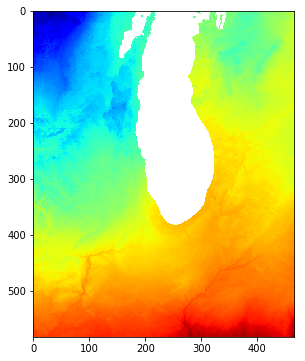

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(nc_subset_montmax80.variables['tmax'][0], cmap='jet')

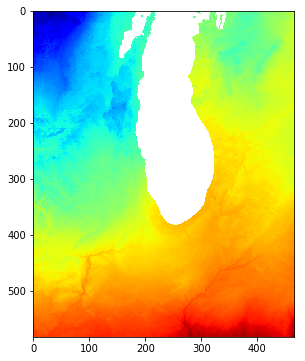

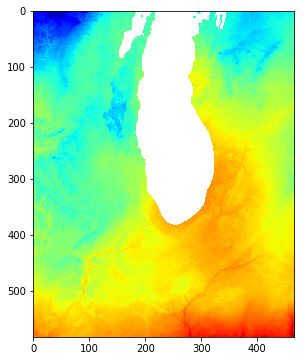

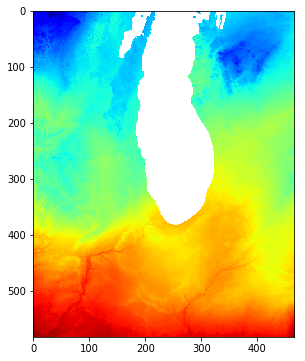

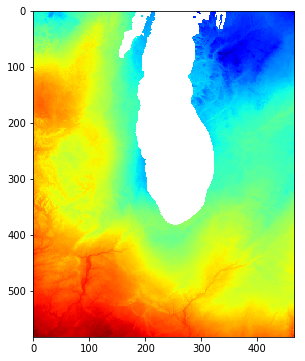

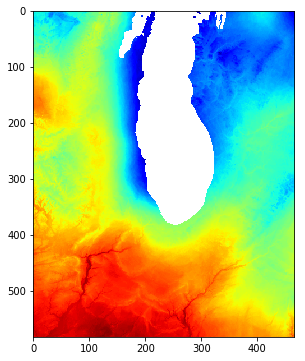

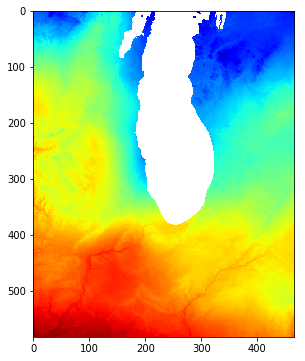

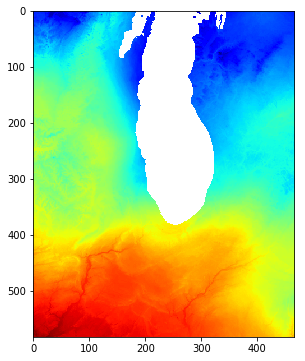

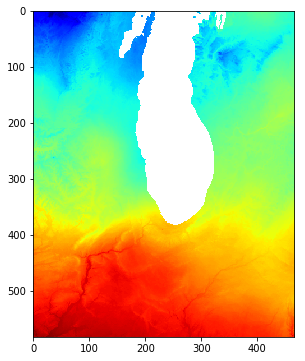

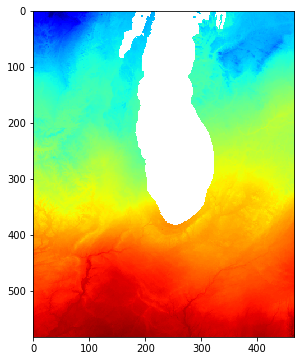

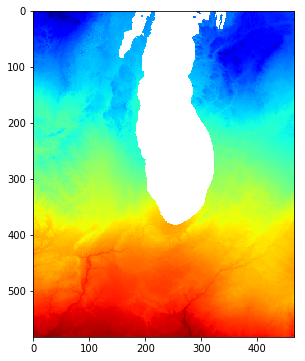

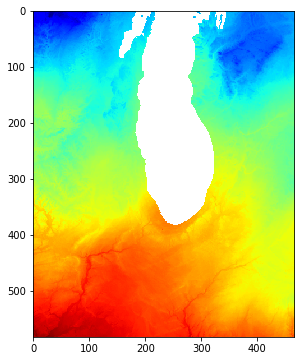

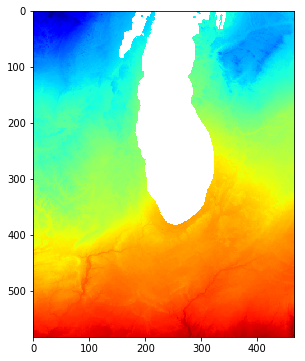

In [23]:
for i in range(12):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(nc_subset_montmax80.variables['tmax'][i], cmap='jet')